# Checkpoint 1 - DISRUPTIVE ARCHITECTURES IOT, IOB & GENERATIVE AI

Integrantes:

Natan Junior Rodrigues Lopes RM: 552626

Pedro Lucca Medeiros Miranda RM: 553873

Pedro Moreira de Jesus       RM: 553912

## Instalação do Inference e importação das bibliotecas necessárias

> Adicionar aspas



In [2]:
!pip install inference
from inference import get_model
import supervision as sv
import cv2

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of awscli to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.0/669.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.0/906.0 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

## Carregando o modelo do Roboflow

In [32]:
model = get_model(model_id="detector-elefantes-rinocerontes/1", api_key="uclf3WssR6fFiypRp4wo")

## Função responsável pela detecção e geração da imagem

In [35]:
def identificar_elefante_ou_rinoceronte(image_file):
  image = cv2.imread(image_file)
  results = model.infer(image)[0]

  detections = sv.Detections.from_inference(results)


  bounding_box_annotator = sv.BoundingBoxAnnotator()
  label_annotator = sv.LabelAnnotator()

  annotated_image = bounding_box_annotator.annotate(
      scene=image, detections=detections)
  annotated_image = label_annotator.annotate(
      scene=annotated_image, detections=detections)

  sv.plot_image(annotated_image)
  confidence = results.predictions[0].confidence
  confidence_percentage = confidence * 100
  print(f"Confiança de {confidence_percentage:.2f}%")

## Rodando o modelo - Elefante

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


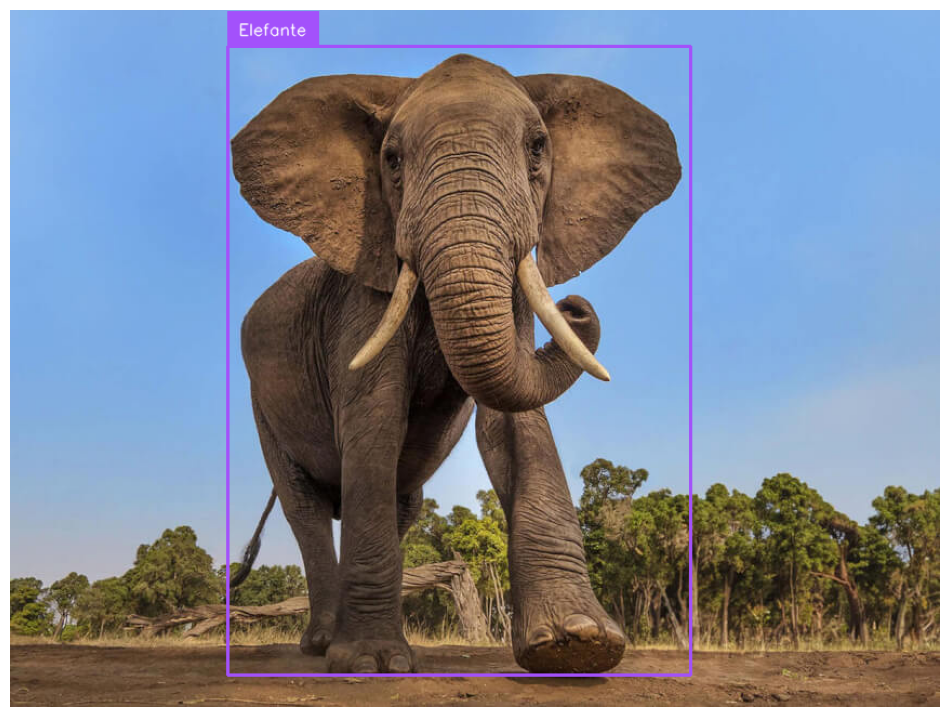

Confiança de 86.53%


In [36]:
identificar_elefante_ou_rinoceronte('elefante.jpeg')

## Rodando o modelo - Rinoceronte

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


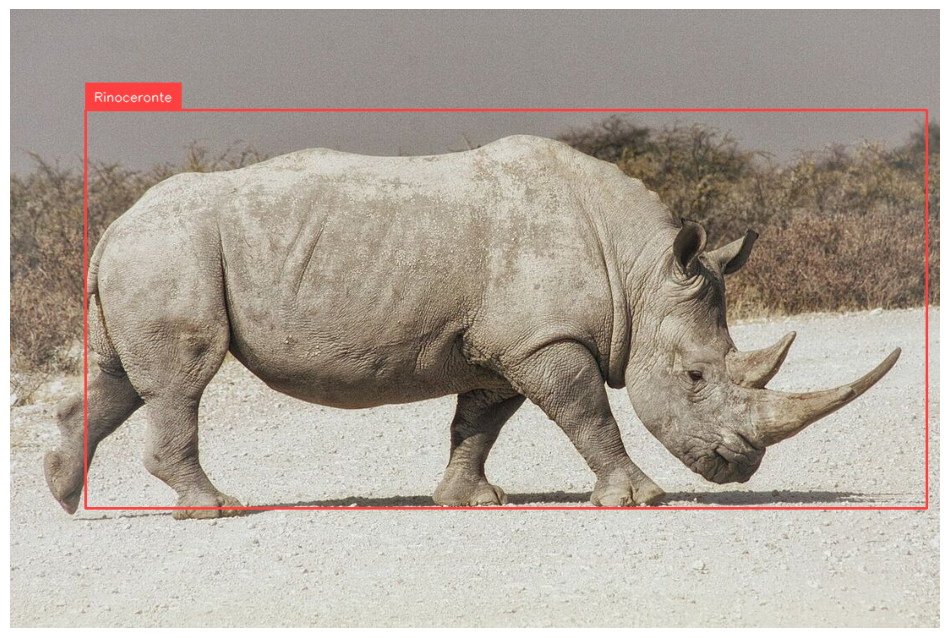

Confiança de 84.17%


In [37]:
identificar_elefante_ou_rinoceronte('rinoceronte.jpeg')

## Rodando o modelo - Elefante e Rinoceronte

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


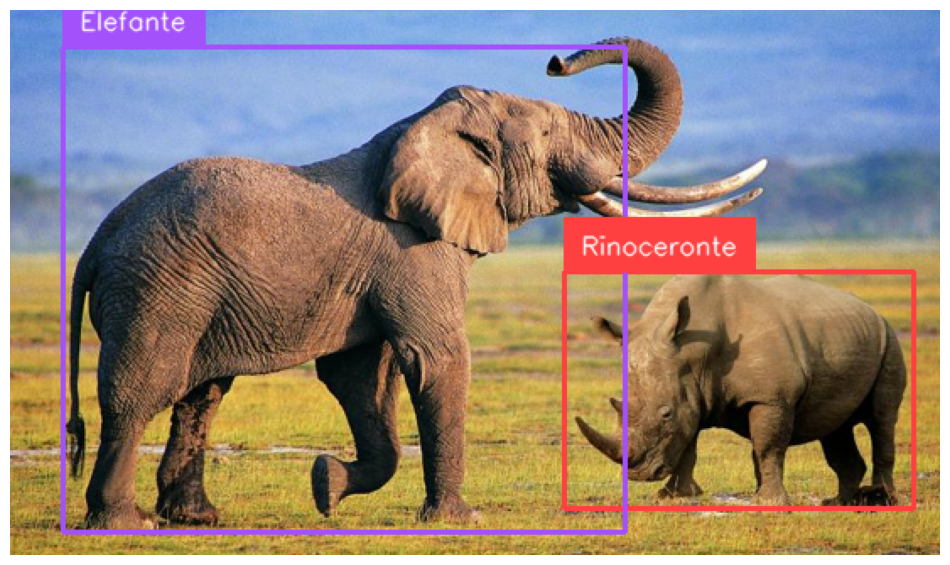

Confiança de 95.09%


In [39]:
identificar_elefante_ou_rinoceronte('elefantes-e-rinocerontes.png')